In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_shor.shor import find_factor, find_order

### Simulations

Start search for the order of 7 in Z_15
Found value 4 for order of 7 in Z_15. If running on noisy 
                quantum hardware, 4 might be a multiple of the order instead.


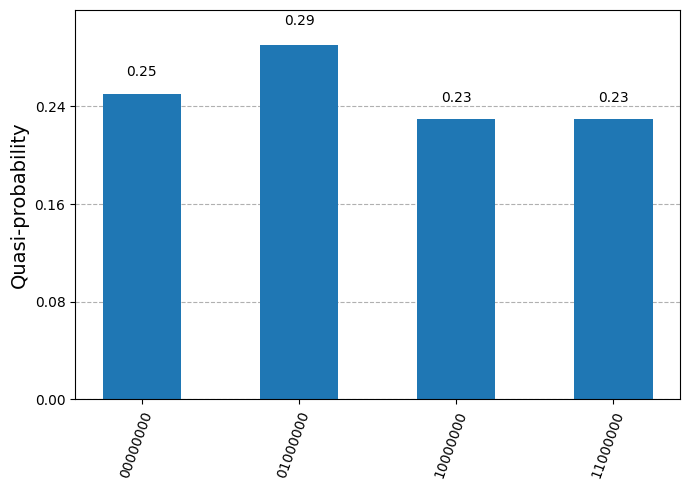

In [3]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
sampler = AerSampler()

r, dist = find_order(A=7, N=15, sampler=sampler, pass_manager=pm, num_shots=100)
plot_distribution(dist)

Start search for the order of 7 in Z_15
Found value 4 for order of 7 in Z_15. If running on noisy 
                quantum hardware, 4 might be a multiple of the order instead.


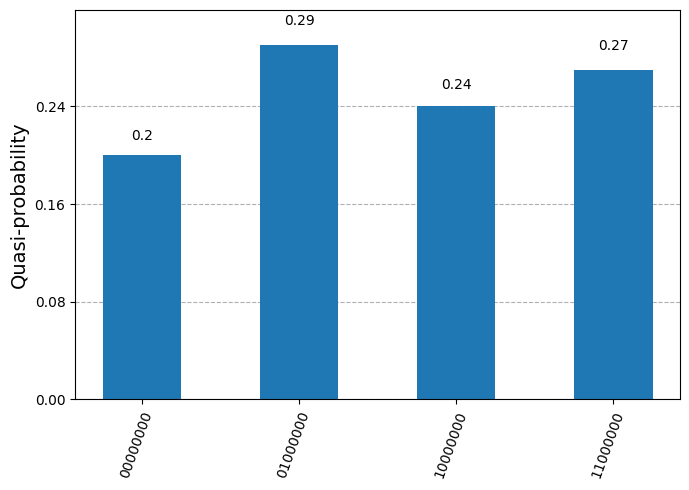

In [4]:
from qiskit.primitives import StatevectorSampler

pm = generate_preset_pass_manager(optimization_level=1)
sampler = StatevectorSampler()

r, dist = find_order(A=7, N=15, sampler=sampler, pass_manager=pm, num_shots=100)

plot_distribution(dist)

### Run on IBM quantum harware

https://quantum.ibm.com

In [5]:
# Load default saved credentials
service = QiskitRuntimeService()

In [ ]:
backend = service.backend("ibm_brisbane")
# n_qubits = 127
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)
print(f"backend: {backend.name}")
pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
sampler = Sampler(mode=backend)

backend: ibm_brisbane


Start search for the order of 7 in Z_15
Found value 4 for order of 7 in Z_15. If running on noisy 
                quantum hardware, 4 might be a multiple of the order instead.


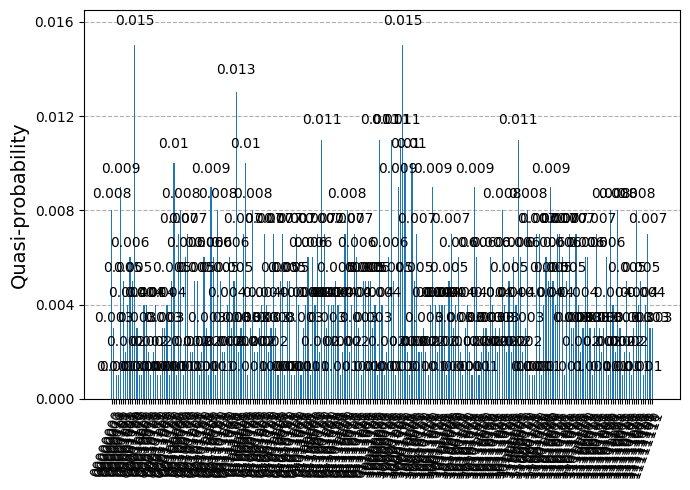

In [10]:
r, dist = find_order(A=7, N=15, sampler=sampler, pass_manager=pm, num_shots=1000)

plot_distribution(dist)

Start search for the order of 7 in Z_15
Found value 4 for the order of 7 in Z_15. If running on noisy quantum hardware, 4 might be a multiple of the order instead.


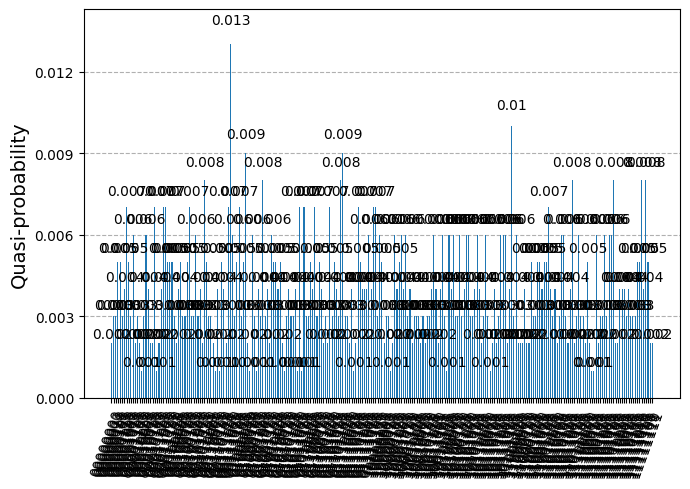

In [14]:
r, dist = find_order(A=7, N=15, sampler=sampler, pass_manager=pm, num_shots=1000, one_control_circuit=True)

plot_distribution(dist)

Start search for the order of 5 in Z_21
Found value 6 for the order of 5 in Z_21. If running on noisy quantum hardware, 6 might be a multiple of the order instead.


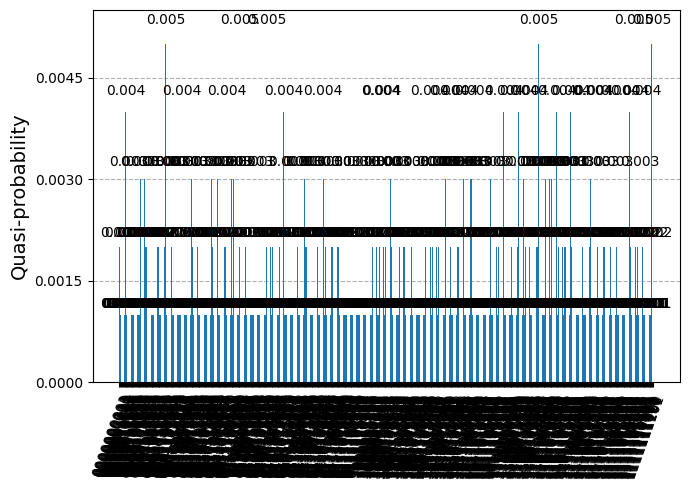

In [27]:
# We use do not use one_control_circuit for N = 21, as the circuit exceeds the number of ECR gates allowed for dynamic (control flow) circuits on the IBM platform.
r, dist = find_order(A=5, N=21, sampler=sampler, pass_manager=pm, num_shots=1000, one_control_circuit=False)

plot_distribution(dist)

In [22]:
f = find_factor(
    N=15, sampler=sampler, pass_manager=pm, num_tries=3, num_shots_per_trial=1000, one_control_circuit=True
)

Start search for the order of 8 in Z_15
Found value 12 for the order of 8 in Z_15. If running on noisy quantum hardware, 12 might be a multiple of the order instead.
Factor found: 3
